# Logging Metrics

In [1]:
import mlflow
import matplotlib.pyplot as plt
mlflow.login()

2024/06/10 13:49:00 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://adb-3088650010345545.5.azuredatabricks.net.


In [2]:
experiment_name = "/Shared/Experiments/logging_function"
tags = {"project_name":"UNDEFINED", "topic":"run_management", "mlflow.note.content":"This experiment is used to test the logging function."}
try:
    experiment_id = mlflow.create_experiment(name = experiment_name, tags = tags)
except:
    print("Experiment already exists.")    
experiment = mlflow.set_experiment(experiment_name)

Experiment already exists.


In [3]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: a6829984b8a24763ae9d40fb57016af1


In [4]:
# Training a deep learning model 
epochs = 100
batch_size = 32
import random
with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    for epoch in range(1,epochs+1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch
        mlflow.log_metric("accuracy", acc, step=epoch)
        mlflow.log_metric("loss",loss, step = epoch)

    # logging a single metric
    mlflow.log_metric("m1", 5.0, step=2)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 1.0, "m3": 6.0}, step=2)

In [5]:
client = mlflow.MlflowClient()

In [6]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = "9a0bb325d84e4561b90a0a0db0b4d364", key="accuracy")

In [7]:
metric_history

[<Metric: key='accuracy', step=1, timestamp=1717973334334, value=0.23161881348179014>,
 <Metric: key='accuracy', step=2, timestamp=1717973335014, value=0.5137798415958549>,
 <Metric: key='accuracy', step=3, timestamp=1717973335525, value=0.5580404151619556>,
 <Metric: key='accuracy', step=4, timestamp=1717973335987, value=0.8104543247828327>,
 <Metric: key='accuracy', step=5, timestamp=1717973336427, value=0.8367673962777957>,
 <Metric: key='accuracy', step=6, timestamp=1717973336865, value=0.9349544257975291>,
 <Metric: key='accuracy', step=7, timestamp=1717973337306, value=0.9743033653001159>,
 <Metric: key='accuracy', step=8, timestamp=1717973337759, value=0.9762606921128509>,
 <Metric: key='accuracy', step=9, timestamp=1717973338204, value=0.9391802969596568>,
 <Metric: key='accuracy', step=10, timestamp=1717973338656, value=0.9177235117689193>,
 <Metric: key='accuracy', step=11, timestamp=1717973339131, value=0.9304603582053455>,
 <Metric: key='accuracy', step=12, timestamp=171797

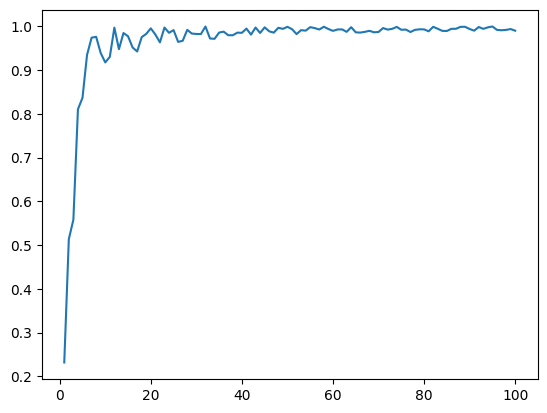

In [8]:
metric_value = [m.value for m in metric_history]
plt.plot(range(1,epochs+1), metric_value)

In [9]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = "9a0bb325d84e4561b90a0a0db0b4d364", key = "m1")
metric_history

[<Metric: key='m1', step=0, timestamp=1717973154704, value=2.0>,
 <Metric: key='m1', step=0, timestamp=1717973379204, value=5.0>,
 <Metric: key='m1', step=2, timestamp=1717973472231, value=5.0>]

# Logging Parameters

In [10]:
with mlflow.start_run(run_name="logging_params", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single parameter
    mlflow.log_param("p1", 2.0)

    # logging multiple parameters
    mlflow.log_params({"p2": 3.0, "p3": 4.0, "p4":"This is a parameter."})

Run ID: 5c0467b680c54ad999acc6a27553b2d7


# Logging Dict

In [11]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary as json
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.json")

    # logging a dictionary as yaml 
    config = {
        "dev":{
            "epochs": 100,
            "batch_size": 32
        },
        "test":{
            "epochs": 50,
            "batch_size": 16
        },
        "prod":{
            "epochs": 10,
            "batch_size": 8
        }
    }
    mlflow.log_dict(dictionary=config, artifact_file="files/config.yaml")


Run ID: 11bb8edf3d414ac0adbab29c485d6ad2


# Logging Artifacts

In [13]:
#Log a single artifact (file)
with mlflow.start_run(run_name="logging_artifact", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifact(local_path="../../images/mlflow_run.jpeg",artifact_path="images")

Run ID: e3a54166f1c34d72977abb1bd9410047


In [14]:
with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifacts(local_dir="../../images",artifact_path="images")

Run ID: 590245ce835f430da87c267db7706f85


# Logging Figure

Log a figure as an artifact. The following figure objects are supported:

* matplotlib.figure.Figure

* plotly.graph_objects.Figure

Run ID: a4c2da65f88a4a4cac0d8bcb45b11bd9


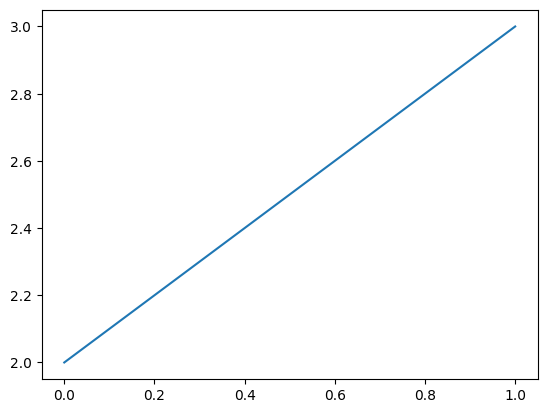

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])

with mlflow.start_run(run_name="logging_figure", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a figure
    mlflow.log_figure(fig, artifact_file="figures/figure.png")

# Logging Image

Log an image as an artifact. The following image objects are supported:

* numpy.ndarray

* PIL.Image.Image

In [22]:
import numpy as np

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

with mlflow.start_run(run_name="logging_image", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an image
    mlflow.log_image(image, artifact_file="image.png")

Run ID: 58ebb79f7b874810ae7ecb1dcc888d1a


# Logging Table

Log a table to MLflow Tracking as a JSON artifact. If the artifact_file already exists in the run, the data would be appended to the existing artifact_file.

* data – Dictionary or pandas.DataFrame to log.

* artifact_file – The run-relative artifact file path in posixpath format to which the table is saved (e.g. “dir/file.json”).

In [31]:
import mlflow

table_dict = {
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
}

with mlflow.start_run(run_name="logging_table", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

Run ID: 86f3395a44d6495a96ac88cdbbcaebff


In [33]:
# Appending more info

table_dict = {
    "inputs": ["This is a new input"],
    "outputs": ["This is a new output"],
    "toxicity": [10.0],
    "new_column": ["This is a new column."],
}

with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

Run ID: 86f3395a44d6495a96ac88cdbbcaebff


2024/06/10 14:25:05 INFO mlflow.tracking.client: Appending new table to already existing artifact results.json for run 86f3395a44d6495a96ac88cdbbcaebff.


In [35]:
import pandas as pd

df = pd.DataFrame({
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
})

with mlflow.start_run(run_name="logging_dataframe", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=df, artifact_file="results.json")

Run ID: 408c39d5d8414d2ebbd9c22df720624b


# Logging Text

Log text as an artifact.

In [36]:
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)
    # Log text to a file under the run's root artifact directory
    mlflow.log_text(text = "simple string",artifact_file= "file1.txt")

    # Log text in a subdirectory of the run's root artifact directory
    mlflow.log_text(text = "another simple string", artifact_file= "dir/file2.txt")

    # Log HTML text
    mlflow.log_text(text = "<h1>header</h1>", artifact_file= "index.html")

Run ID: 5dc1b2d8a7e14098b7ebc1a845d56a4e
